In [1]:
import pandas as pd 
import seaborn as sns
import pandas as pd

In [2]:
column_name = ['Id','Name','Age','Weight','m0006','m0612','m1218','f0006','f0612','f1218']

In [3]:
df = pd.read_csv('patient_heart_rate.csv',names = column_name)

In [4]:
df.head(5)

,Id,Name,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218
0,Id,Name,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218
1,1,Mickéy Mousé,56,70kgs,72,69,71,-,-,-
2,2,Donald Duck,34,154.89lbs,-,-,-,85,84,76
3,3,Mini Mouse,16,NaN,-,-,-,65,69,72
4,4,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-


In [5]:
df[['Firstname','Lastname']] = df['Name'].str.split(expand=True)
df = df.drop("Name", axis=1)

In [6]:
df.head(5)

,Id,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,Id,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218,Name,None
1,1,56,70kgs,72,69,71,-,-,-,Mickéy,Mousé
2,2,34,154.89lbs,-,-,-,85,84,76,Donald,Duck
3,3,16,NaN,-,-,-,65,69,72,Mini,Mouse
4,4,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck


In [7]:
weight = df['Weight']
for i in range(0, len(weight)):
     x = str(weight[i])
     if 'lbs' in x[-3:]:
         x = x[:-3:]
         float_x = float(x)
         y= int (float_x/2.2)
         #y = str(y)
         weight[i]= y
     if 'kgs' in x[-3:]:
         x= x[:-3:]
         float_x = float(x)
         weight[i] = x    

In [8]:
df.rename(columns={'Weight':'Weight_kgs'},inplace=True)

In [9]:
df.head(5)

,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,Id,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218,Name,None
1,1,56,70,72,69,71,-,-,-,Mickéy,Mousé
2,2,34,70,-,-,-,85,84,76,Donald,Duck
3,3,16,NaN,-,-,-,65,69,72,Mini,Mouse
4,4,NaN,78,78,79,72,-,-,-,Scrooge,McDuck


In [10]:
df.dropna(how='all', inplace=True)

In [11]:
df = df.drop_duplicates(subset = ['Firstname','Lastname','Age','Weight_kgs'])

In [12]:
df.Firstname.replace({r'[^\x00-\x7F]+':''},regex=True,inplace=True)
df.Lastname.replace({r'[^\x00-\x7F]+':''},regex=True,inplace=True)
print(df)

    Id  Age Weight_kgs  m0006  m0612  m1218  f0006  f0612  f1218 Firstname  \
0   Id  Age     Weight  m0006  m0612  m1218  f0006  f0612  f1218      Name   
1    1   56         70     72     69     71      -      -      -     Micky   
2    2   34         70      -      -      -     85     84     76    Donald   
3    3   16        NaN      -      -      -     65     69     72      Mini   
4    4  NaN         78     78     79     72      -      -      -   Scrooge   
5    5   54         90      -      -      -     69    NaN     75      Pink   
6    6   52         85      -      -      -     68     75     72      Huey   
7    7   19         56      -      -      -     71     78     75     Dewey   
8    8   32         78     78     76     75      -      -      -      Scpy   
12  10   12         45      -      -      -     92     95     87     Louie   
13  11  NaN         60     78     75     72      -      -      -     Henry   
14  12   34        NaN     65     67     55      -      -      -

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15964\1822382722.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Firstname.replace({r'[^\x00-\x7F]+':''},regex=True,inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15964\1822382722.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [13]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15964\1258158026.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mode()[0], inplace=True)


In [14]:
print(df['Weight_kgs'].dtype)


object


In [15]:
non_numeric_values = df[~df['Weight_kgs'].apply(lambda x: isinstance(x, (int, float)))]
print(non_numeric_values)

    Id  Age Weight_kgs  m0006  m0612  m1218  f0006  f0612  f1218 Firstname  \
0   Id  Age     Weight  m0006  m0612  m1218  f0006  f0612  f1218      Name   
1    1   56         70     72     69     71      -      -      -     Micky   
4    4   34         78     78     79     72      -      -      -   Scrooge   
7    7   19         56      -      -      -     71     78     75     Dewey   
8    8   32         78     78     76     75      -      -      -      Scpy   
12  10   12         45      -      -      -     92     95     87     Louie   
13  11   34         60     78     75     72      -      -      -     Henry   

   Lastname  
0      None  
1      Mous  
4    McDuck  
7    McDuck  
8       Doo  
12   McDuck  
13      Nam  


In [16]:
df['Weight_kgs'] = pd.to_numeric(df['Weight_kgs'], errors='coerce')

# Kiểm tra lại kiểu dữ liệu
print(df['Weight_kgs'].dtype)

float64


In [17]:
median_weight = df['Weight_kgs'].median()
df['Weight_kgs'].fillna(median_weight, inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15964\2587249362.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight_kgs'].fillna(median_weight, inplace=True)


In [18]:
df['Weight_kgs'].fillna(df['Weight_kgs'].median(), inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15964\1979542691.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight_kgs'].fillna(df['Weight_kgs'].median(), inplace=True)


In [19]:
df = pd.melt(df, id_vars=['Id','Age','Weight_kgs','Firstname','Lastname'], value_name='PulseRate', var_name='gender_time').sort_values(['Id','Age','Weight_kgs','Firstname','Lastname'])

In [20]:
df_temp = df['gender_time'].str.extract("(\D)(\d+)(\d{2})", expand=True)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15964\394222301.py:1: SyntaxWarning: invalid escape sequence '\D'
  df_temp = df['gender_time'].str.extract("(\D)(\d+)(\d{2})", expand=True)


In [21]:
df_temp.columns = ['Gender','Lower_hour','Upper_hour']

In [22]:
df = pd.concat([df,df_temp], axis=1)

In [23]:
df = df.drop(['gender_time'], axis=1)

In [24]:
import numpy as np

In [25]:
df = df.replace('-', np.nan).dropna(subset=['PulseRate'])
df.head(10)

,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
1,1,56,70.0,Micky,Mous,72,m,00,06
16,1,56,70.0,Micky,Mous,69,m,06,12
31,1,56,70.0,Micky,Mous,71,m,12,18
54,10,12,45.0,Louie,McDuck,92,f,00,06
69,10,12,45.0,Louie,McDuck,95,f,06,12
84,10,12,45.0,Louie,McDuck,87,f,12,18
10,11,34,60.0,Henry,Nam,78,m,00,06
25,11,34,60.0,Henry,Nam,75,m,06,12
40,11,34,60.0,Henry,Nam,72,m,12,18
11,12,34,74.0,Michel,Long,65,m,00,06


In [26]:
df['Firstname'].isnull().sum()

np.int64(3)

In [27]:
df['Lastname'].isnull().sum()

np.int64(9)

In [28]:
df['Firstname'].fillna('Unknown', inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15964\3736532249.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Firstname'].fillna('Unknown', inplace=True)


In [29]:
df['Lastname'].fillna('Unknown', inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15964\3198000358.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lastname'].fillna('Unknown', inplace=True)


In [30]:
df = df.reset_index()

In [31]:
df.to_csv('patient_heart_rate_clean.csv')

In [32]:
# Cau 1: Vẽ biểu đồ Pie để thể hiện tỉ lệ bệnh nhân nam và nữ
df.head(5)

,index,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
0,1,1,56,70.0,Micky,Mous,72,m,00,06
1,16,1,56,70.0,Micky,Mous,69,m,06,12
2,31,1,56,70.0,Micky,Mous,71,m,12,18
3,54,10,12,45.0,Louie,McDuck,92,f,00,06
4,69,10,12,45.0,Louie,McDuck,95,f,06,12


In [33]:
df = pd.read_csv('patient_heart_rate_clean.csv')
df.head(5)

,Unnamed: 0,index,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
0,0,1,1,56,70.0,Micky,Mous,72,m,0,6
1,1,16,1,56,70.0,Micky,Mous,69,m,6,12
2,2,31,1,56,70.0,Micky,Mous,71,m,12,18
3,3,54,10,12,45.0,Louie,McDuck,92,f,0,6
4,4,69,10,12,45.0,Louie,McDuck,95,f,6,12


In [34]:
gender_counts = df['Gender'].value_counts()

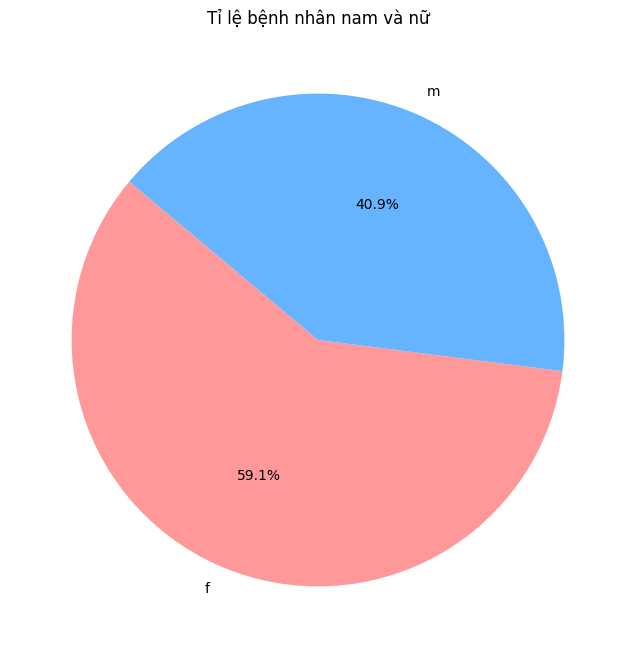

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])

# Thêm tiêu đề
plt.title('Tỉ lệ bệnh nhân nam và nữ')

# Hiển thị biểu đồ
plt.show()

In [36]:
df = pd.read_csv('patient_heart_rate_clean.csv')

In [37]:
df.head(10)

,Unnamed: 0,index,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
0,0,1,1,56,70.0,Micky,Mous,72,m,0,6
1,1,16,1,56,70.0,Micky,Mous,69,m,6,12
2,2,31,1,56,70.0,Micky,Mous,71,m,12,18
3,3,54,10,12,45.0,Louie,McDuck,92,f,0,6
4,4,69,10,12,45.0,Louie,McDuck,95,f,6,12
5,5,84,10,12,45.0,Louie,McDuck,87,f,12,18
6,6,10,11,34,60.0,Henry,Nam,78,m,0,6
7,7,25,11,34,60.0,Henry,Nam,75,m,6,12
8,8,40,11,34,60.0,Henry,Nam,72,m,12,18
9,9,11,12,34,74.0,Michel,Long,65,m,0,6


In [38]:
df['Fullname'] = df['Firstname'] + ' ' + df['Lastname']

In [39]:
df.head(10)

,Unnamed: 0,index,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour,Fullname
0,0,1,1,56,70.0,Micky,Mous,72,m,0,6,Micky Mous
1,1,16,1,56,70.0,Micky,Mous,69,m,6,12,Micky Mous
2,2,31,1,56,70.0,Micky,Mous,71,m,12,18,Micky Mous
3,3,54,10,12,45.0,Louie,McDuck,92,f,0,6,Louie McDuck
4,4,69,10,12,45.0,Louie,McDuck,95,f,6,12,Louie McDuck
5,5,84,10,12,45.0,Louie,McDuck,87,f,12,18,Louie McDuck
6,6,10,11,34,60.0,Henry,Nam,78,m,0,6,Henry Nam
7,7,25,11,34,60.0,Henry,Nam,75,m,6,12,Henry Nam
8,8,40,11,34,60.0,Henry,Nam,72,m,12,18,Henry Nam
9,9,11,12,34,74.0,Michel,Long,65,m,0,6,Michel Long


In [40]:
#Cau 3:Vẽ biểu đồ cột so sánh độ tuổi giữa các tên bệnh nhân

In [41]:
df['Fullname'] = df['Firstname'] + ' ' + df['Lastname']

In [42]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df_cleaned = df[['Fullname', 'Age']].dropna().drop_duplicates()

In [43]:
df_unique = df[['Fullname', 'Age']].drop_duplicates()

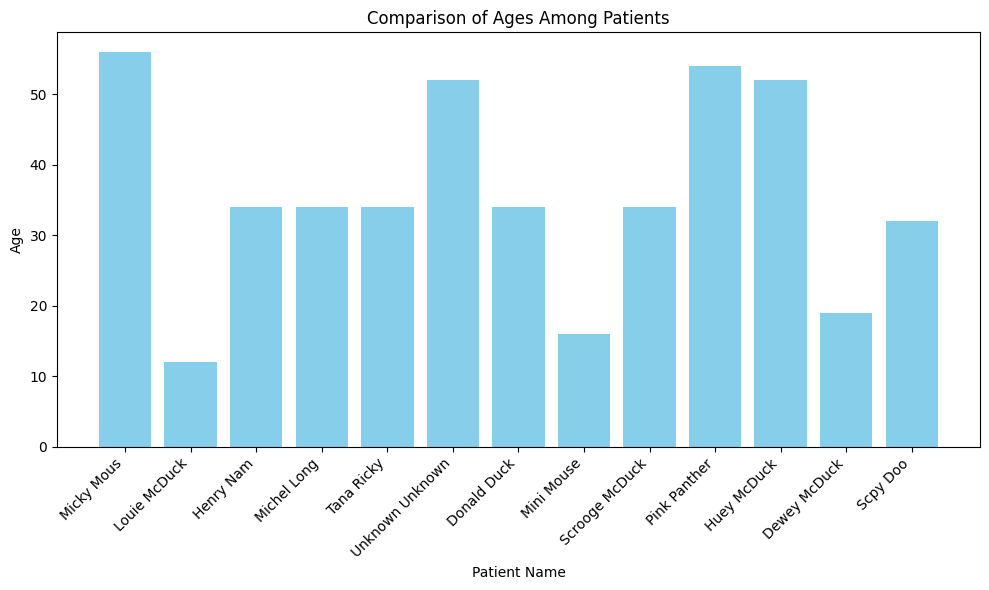

In [44]:
import matplotlib.pyplot as plt
if df_cleaned.empty:
    print("Error: No valid data to plot after cleaning. Please check your input data.")
else:
    # Plotting the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(df_cleaned['Fullname'], df_cleaned['Age'], color='skyblue')
    plt.xlabel('Patient Name')
    plt.ylabel('Age')
    plt.title('Comparison of Ages Among Patients')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Show the plot
    plt.show()

In [45]:
# Cau 4: Vẽ biểu đồ cột so sánh nhịp tim trung bình giữa các tên bệnh nhân

In [46]:
df['Fullname'] = df['Firstname'] + ' ' + df['Lastname']

In [47]:
df['PulseRate'] = pd.to_numeric(df['PulseRate'], errors='coerce')

In [48]:
avg_pulse_rate = df.groupby('Fullname')['PulseRate'].mean().reset_index()

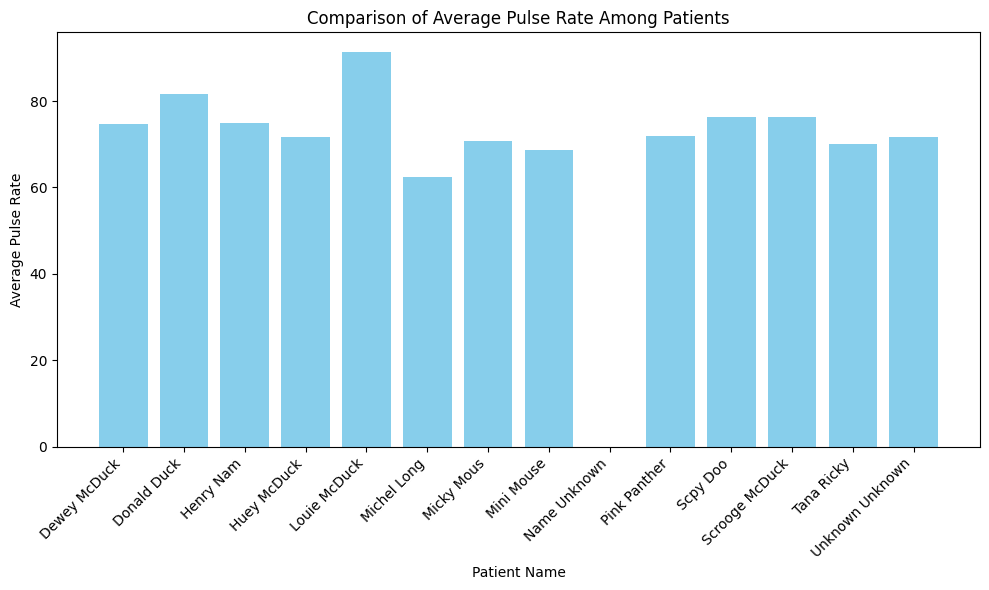

In [49]:
if avg_pulse_rate.empty:
    print("Error: No valid data to plot. Please check your input data.")
else:
    # Plotting the bar chart for average PulseRate
    plt.figure(figsize=(10, 6))
    plt.bar(avg_pulse_rate['Fullname'], avg_pulse_rate['PulseRate'], color='skyblue')
    plt.xlabel('Patient Name')
    plt.ylabel('Average Pulse Rate')
    plt.title('Comparison of Average Pulse Rate Among Patients')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Show the plot
    plt.show()

In [50]:
#Cau 5:Vẽ biểu đồ cột so sánh nhịp tim trung bình theo từng nhóm giờ 00-06, 06-12,12-18 có phân loại theo giới tính

In [51]:
df['PulseRate'] = pd.to_numeric(df['PulseRate'], errors='coerce')

In [52]:
time_gender_pulse = df.groupby(['Lower_hour', 'Gender'])['PulseRate'].mean().reset_index()

In [53]:
time_labels = {0: '00-06', 6: '06-12', 12: '12-18'}

In [54]:
time_gender_pulse['Time Interval'] = time_gender_pulse['Lower_hour'].map(time_labels)

In [55]:
pivot_df = time_gender_pulse.pivot(index='Time Interval', columns='Gender', values='PulseRate')

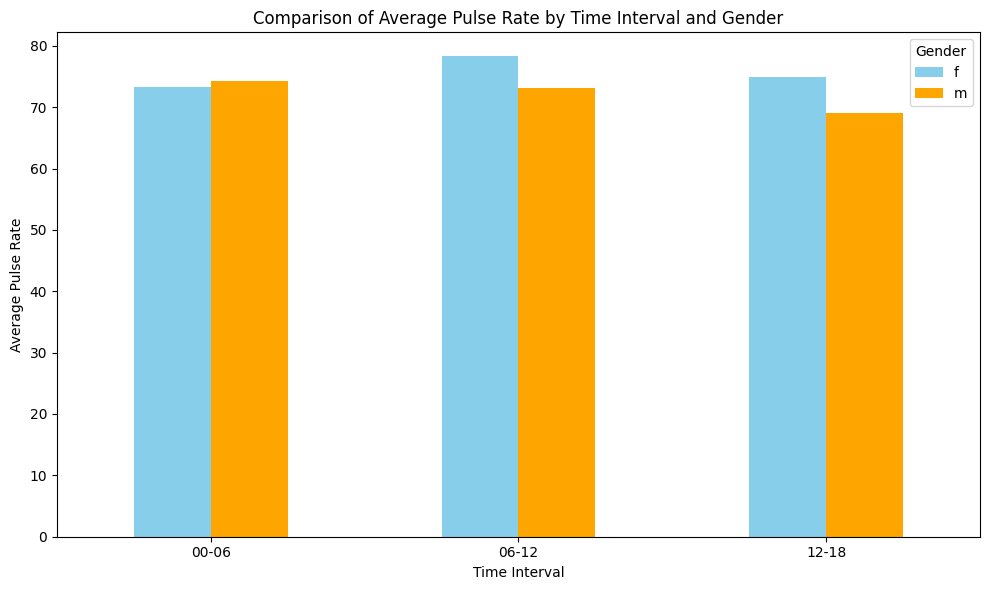

In [56]:
pivot_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.xlabel('Time Interval')
plt.ylabel('Average Pulse Rate')
plt.title('Comparison of Average Pulse Rate by Time Interval and Gender')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

In [57]:
#Cau 6: Vẽ biểu đồ phân tán thể hiện tương quan giữa trung bình độ tuổi và trung bình nhịp tim

In [58]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['PulseRate'] = pd.to_numeric(df['PulseRate'], errors='coerce')

In [59]:
avg_stats = df.groupby('Id').agg({'Age': 'mean', 'PulseRate': 'mean'}).reset_index()

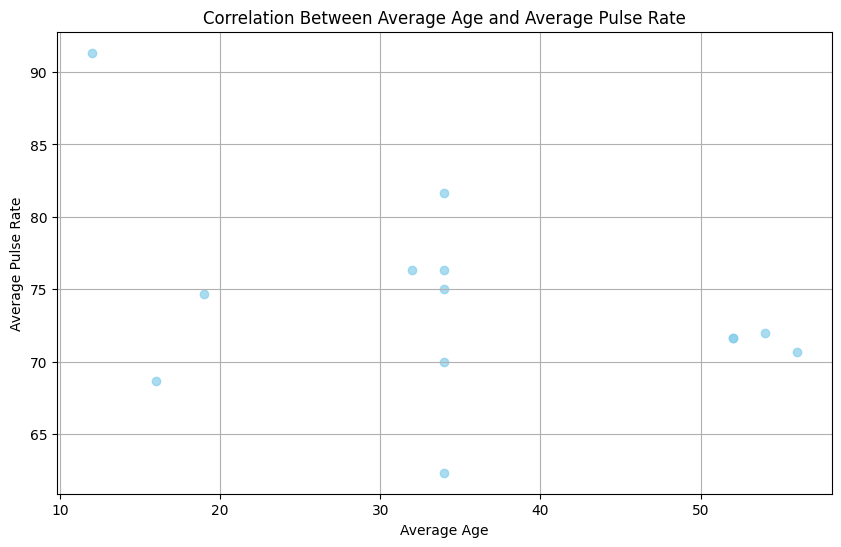

In [60]:
if avg_stats.empty:
    print("Error: No valid data to plot. Please check your input data.")
else:
    # Plotting the scatter plot for average Age and average PulseRate
    plt.figure(figsize=(10, 6))
    plt.scatter(avg_stats['Age'], avg_stats['PulseRate'], color='skyblue', alpha=0.7)
    plt.xlabel('Average Age')
    plt.ylabel('Average Pulse Rate')
    plt.title('Correlation Between Average Age and Average Pulse Rate')
    plt.grid(True)

    # Show the plot
    plt.show()

In [61]:
#Cau 7:Vẽ biểu đồ đường thể hiện sự thay đổi của nhịp tim trung bình các bệnh nhân theo thứ tự khung giờ 00-06, 06-12,12-18 theo từng nhóm giới tính.

In [62]:
df['PulseRate'] = pd.to_numeric(df['PulseRate'], errors='coerce')

In [63]:
time_gender_pulse = df.groupby(['Lower_hour', 'Gender'])['PulseRate'].mean().reset_index()

In [64]:
time_labels = {0: '00-06', 6: '06-12', 12: '12-18'}

In [65]:
time_gender_pulse['Time Interval'] = time_gender_pulse['Lower_hour'].map(time_labels)

In [66]:
time_gender_pulse.sort_values(by='Lower_hour', inplace=True)

In [67]:
male_data = time_gender_pulse[time_gender_pulse['Gender'] == 'm']
female_data = time_gender_pulse[time_gender_pulse['Gender'] == 'f']

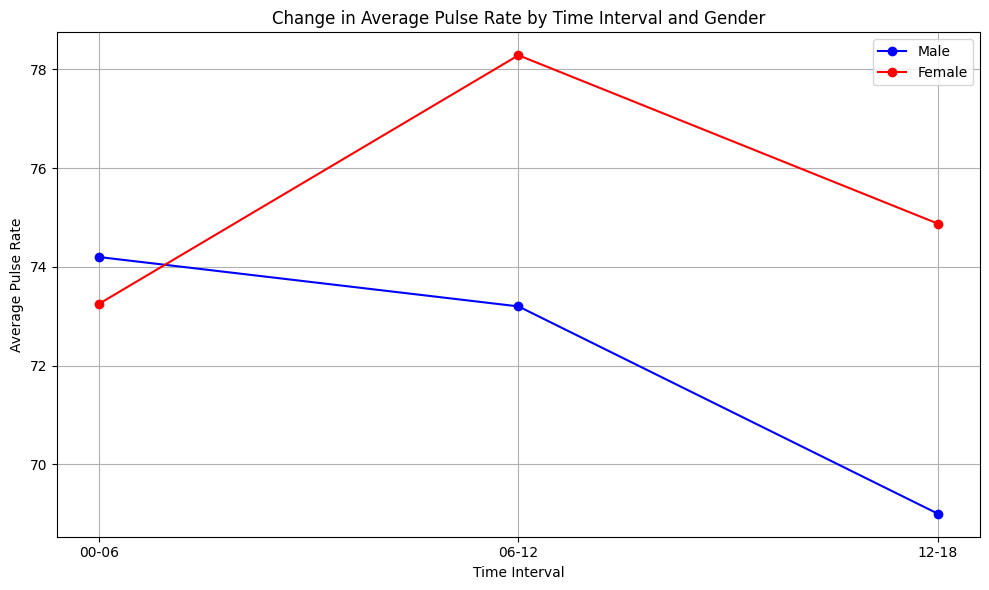

In [68]:
plt.figure(figsize=(10, 6))

plt.plot(male_data['Time Interval'], male_data['PulseRate'], marker='o', linestyle='-', color='blue', label='Male')
plt.plot(female_data['Time Interval'], female_data['PulseRate'], marker='o', linestyle='-', color='red', label='Female')

plt.xlabel('Time Interval')
plt.ylabel('Average Pulse Rate')
plt.title('Change in Average Pulse Rate by Time Interval and Gender')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()